# THEORY

## Types of Recommender system (RS)

### **Content Based Filtering**

They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.        

### **Collaborative Filtering**

This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.

### **Demographic Filtering**

They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

# **Project**

<a id=1></a>    

<div style="padding:15px;
            color:white;
            margin:0;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#588157;
            overflow:hidden;
            font-weight:500">
        1. Executive Summary
</div>

[go on top](#0)
<br>[go next chapter ↓](#2)

<a id=2></a>    

<div style="padding:15px;
            color:white;
            margin:0;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#706677;
            overflow:hidden;
            font-weight:500">
        2. Imports
</div>

[go on top](#0)
<br>[go previous chapter ↑](#1)
<br>[go next chapter ↓](#3)

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# For multiple pretty-prints of dataframes from single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from warnings import simplefilter
# ignore warnings to clean up output cells
simplefilter("ignore")

import missingno as msno


https://www.kaggle.com/code/gspmoreira/recommender-systems-in-python-101/data

<a id=3></a> 

<div style="padding:15px;
            color:white;
            margin:0;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#6a994e;
            overflow:hidden;
            font-weight:500">
       3. Exploratory Data Analysis
</div>   

[go on top](#0)
<br>[go previous chapter ↑](#2)
<br>[go next chapter ↓](#4)

### **About the dataset:**

Deskdrop is an internal communications platform developed by CI&T, focused in companies using Google G Suite. Among other features, this platform allows companies employees to share relevant articles with their peers, and collaborate around them.

This dataset contains a real sample of 12 months logs (Mar. 2016 - Feb. 2017) from CI&T's Internal Communication platform (DeskDrop).
I contains about 73k logged users interactions on more than 3k public articles shared in the platform.

This dataset features some distinctive characteristics:
- **Item attributes:** Articles' original URL, title, and content plain text are available in two languages (English and Portuguese).
- **Contextual information:** Context of the users visits, like date/time, client (mobile native app / browser) and geolocation.
- **Logged users:** All users are required to login in the platform, providing a long-term tracking of users preferences (not depending on cookies in devices).
- **Rich implicit feedback:** Different interaction types were logged, making it possible to infer the user's level of interest in the articles (eg. comments > likes > views).
- **Multi-platform:** Users interactions were tracked in different platforms (web browsers and mobile native apps)

___

### **Articles file EDA:**

In [2]:
# Read data
articles = pd.read_csv("./data/shared_articles.csv")

# Print first 5 rows 
print("\nArticles dataframe:")
articles.head()


Articles dataframe:


,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


___

In [21]:
# View number of unique values:
t = []
for col in articles.columns:
    t.append([col, pd.notna(articles[col]).sum(), len(articles[col].unique())])
t = pd.DataFrame(t, columns=["Column", "Not-NaN values", "Unique values"])
t["Dtype"] = list(articles.dtypes)
t

,Column,Not-NaN values,Unique values,Dtype
0,timestamp,3122,3121,int64
1,eventType,3122,2,object
2,contentId,3122,3057,int64
3,authorPersonId,3122,252,int64
4,authorSessionId,3122,2017,int64
5,authorUserAgent,680,115,object
6,authorRegion,680,20,object
7,authorCountry,680,6,object
8,contentType,3122,3,object
9,url,3122,3029,object


___

timestamp           int64
eventType          object
contentId           int64
authorPersonId      int64
authorSessionId     int64
authorUserAgent    object
authorRegion       object
authorCountry      object
contentType        object
url                object
title              object
text               object
lang               object
dtype: object


Missing values in interactions dataframe:


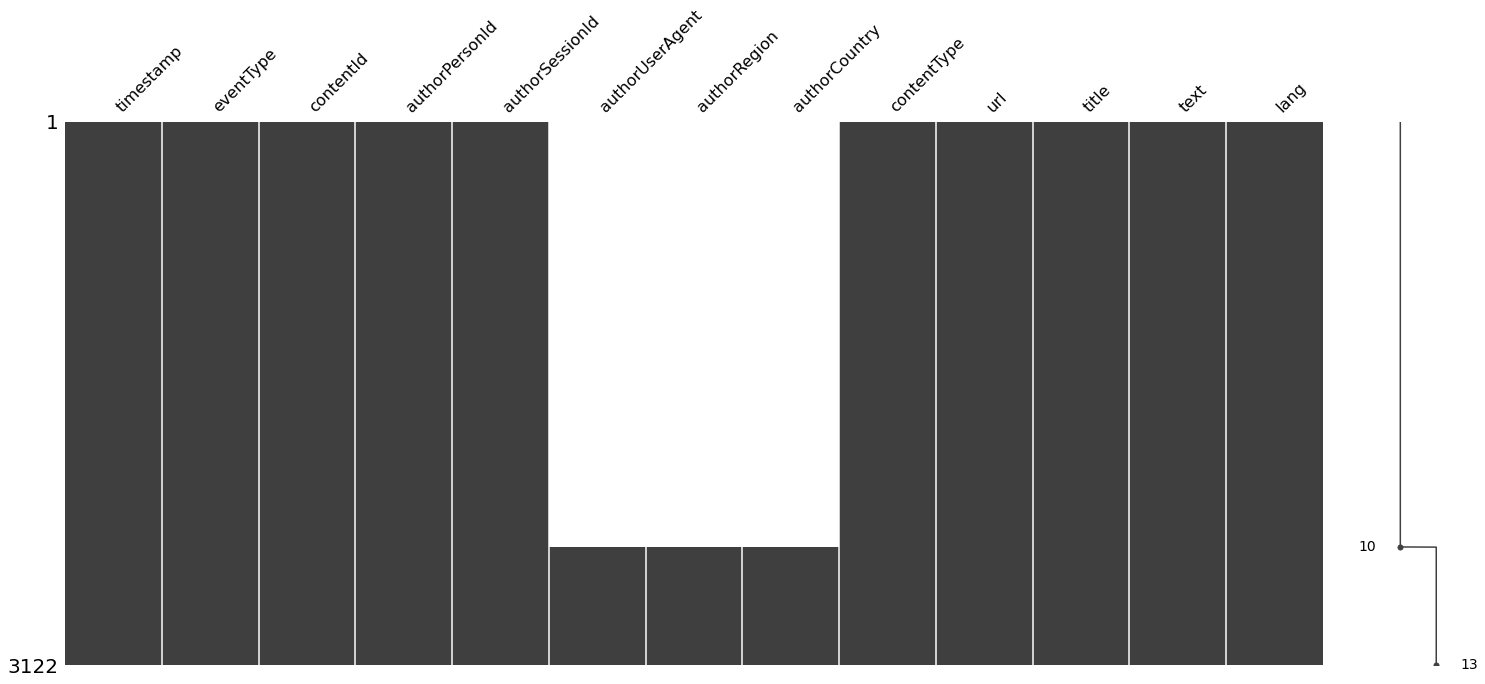

In [4]:
# View missing values in the dataframe
print("\nMissing values in interactions dataframe:")
fig = msno.matrix(articles)
plt.show()

___

In [5]:
# Average length of title
title_words = articles["title"].str.count(" ") + 1
print(f"There are around {title_words.mean():.0f} words in each title")

There are around 9 words in each title


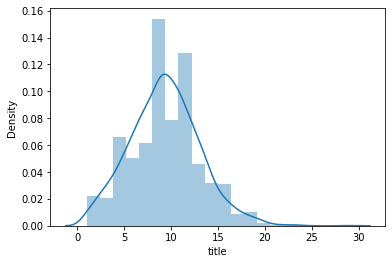

In [6]:
# Title length in words
fig = sns.distplot(title_words, bins=20)

___

In [7]:
# Average length of text
text_words = articles["text"].str.count(" ") + 1
print(f"There are around {text_words.mean():.0f} words in each article")

There are around 899 words in each article


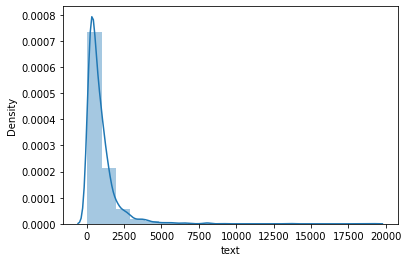

In [8]:
# Title length in words
fig = sns.distplot(text_words, bins=20)

___

View correlation between title length and article length:


,title words,text words
title words,1.00000,-0.09859
text words,-0.09859,1.00000


Heatmap:


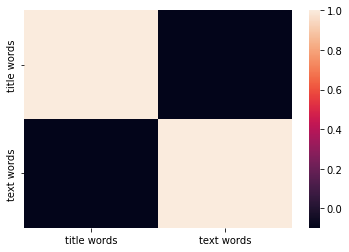

In [9]:
# View correlation between title length and article length
df = pd.concat([title_words, text_words], ignore_index=True, axis=1)
df.columns = ["title words", "text words"]
print("View correlation between title length and article length:")
df.corr(method="pearson")
print("Heatmap:")
fig = sns.heatmap(df.corr(method="pearson"))

There is no significant correlation between title and article length.

___

In [10]:
# Number of records in dataframe:
print(f"There are {len(articles)} records in this dataframe.")

There are 3122 records in this dataframe.


___

___

Text(0.5, 1.0, 'Authors by country')

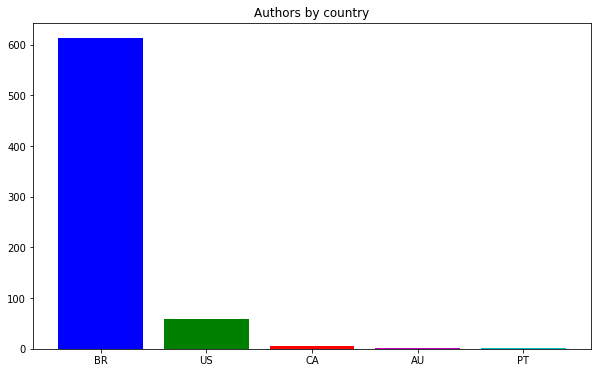

In [145]:
# View authors by country
data = articles["authorCountry"].value_counts()
fig = plt.bar(x = data.index, 
              height = data,
              color=["b", "g", "r", "m", "c"])
plt.title("Authors by country")
plt.show()

___

In [168]:
print("Authors by region")
articles["authorRegion"].value_counts()

Authors by region


SP     533
MG      75
NY      20
NJ      16
GA       7
IL       6
ON       4
RJ       4
NSW      2
TX       2
?        2
SC       2
RI       1
AB       1
FL       1
13       1
WA       1
CA       1
MS       1
Name: authorRegion, dtype: int64

___

In [104]:
# View event types
print("Event types:")
articles["eventType"].value_counts()

Event types:


CONTENT SHARED     3047
CONTENT REMOVED      75
Name: eventType, dtype: int64

___

In [250]:
# View articles content type
print("Articles content type:")
articles["contentType"].value_counts()

Articles content type:


HTML     3101
VIDEO      11
RICH       10
Name: contentType, dtype: int64

### **Interactions file EDA:**

In [22]:
interactions = pd.read_csv("./data/users_interactions.csv")

print("\nInteractions dataframe:")
interactions.head()


Interactions dataframe:


,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN



Missing values in interactions dataframe:


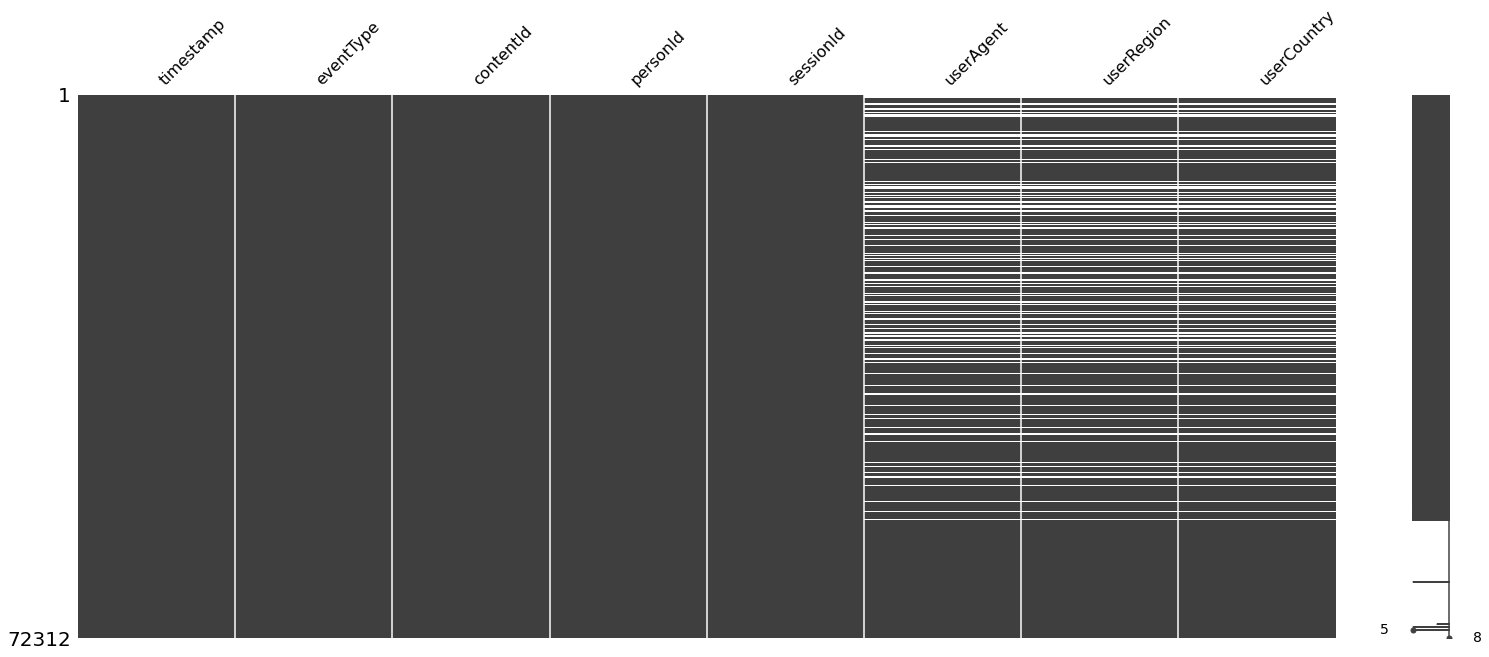

In [23]:
# View missing values in the dataframe
print("\nMissing values in interactions dataframe:")
fig = msno.matrix(interactions)
plt.show()

In [30]:
# View number of unique values:
t = []
for col in interactions.columns:
    t.append([col, pd.notna(interactions[col]).sum(), len(interactions[col].unique())])
t = pd.DataFrame(t, columns=["Column", "Not-NaN values", "Unique values"])
t["Dtype"] = list(interactions.dtypes)
t

,Column,Not-NaN values,Unique values,Dtype
0,timestamp,72312,68772,int64
1,eventType,72312,5,object
2,contentId,72312,2987,int64
3,personId,72312,1895,int64
4,sessionId,72312,28740,int64
5,userAgent,56918,1091,object
6,userRegion,56907,72,object
7,userCountry,56918,24,object


 Note there are 1895 unique *personId*

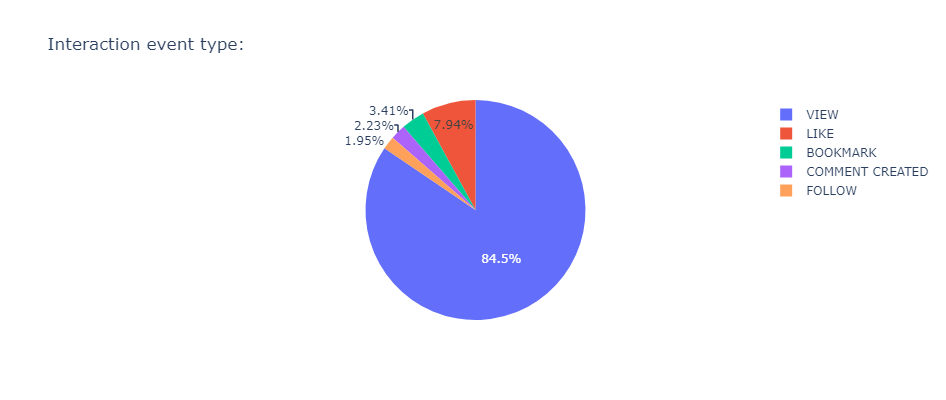

In [59]:
# View event type
data = interactions["eventType"].value_counts()
fig = px.pie(data, 
             values="eventType", 
             names=data.index, 
             title="Interaction event type:",  
             width=600, 
             height=400)
fig.show()

In [32]:
interactions["userRegion"].value_counts()

SP    40164
MG    10229
NY     1257
TX      923
GA      910
      ...  
R         1
CE        1
NH        1
MN        1
CL        1
Name: userRegion, Length: 71, dtype: int64

In [31]:
interactions["userCountry"].value_counts()

BR    51396
US     4657
KR      239
CA      226
JP      144
AU      138
GB       22
DE       19
IE       14
IS       13
ZZ       11
SG       11
AR        7
PT        6
ES        3
IN        3
MY        2
IT        2
CN        1
NL        1
CL        1
CO        1
CH        1
Name: userCountry, dtype: int64

___

timestamp           int64
eventType          object
contentId           int64
authorPersonId      int64
authorSessionId     int64
authorUserAgent    object
authorRegion       object
authorCountry      object
contentType        object
url                object
title              object
text               object
lang               object
dtype: object


Missing values in interactions dataframe:


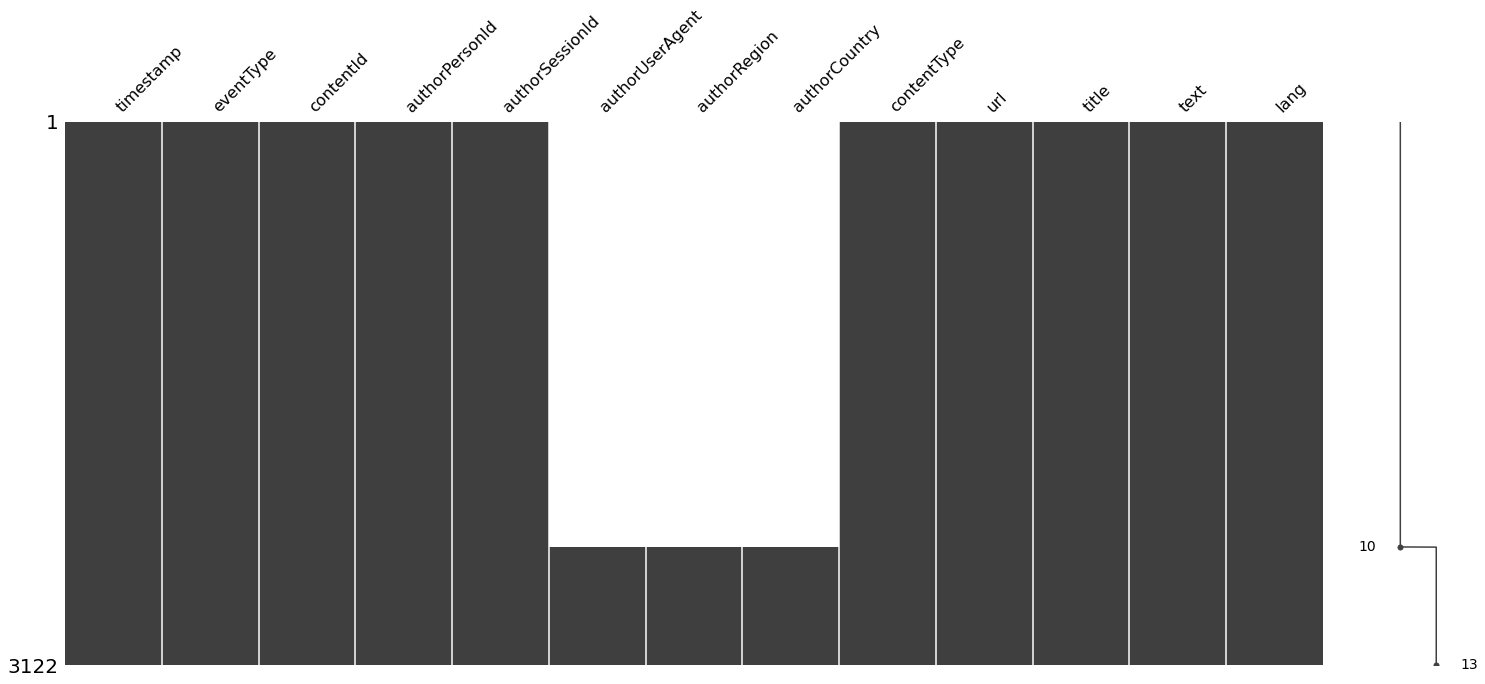

In [4]:
# View missing values in the dataframe
print("\nMissing values in interactions dataframe:")
fig = msno.matrix(articles)
plt.show()

___

In [5]:
# Average length of title
title_words = articles["title"].str.count(" ") + 1
print(f"There are around {title_words.mean():.0f} words in each title")

There are around 9 words in each title


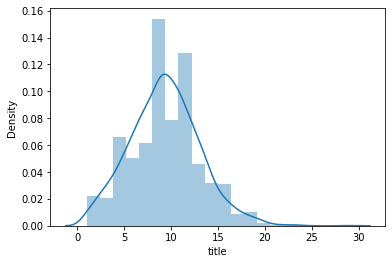

In [6]:
# Title length in words
fig = sns.distplot(title_words, bins=20)

___

In [7]:
# Average length of text
text_words = articles["text"].str.count(" ") + 1
print(f"There are around {text_words.mean():.0f} words in each article")

There are around 899 words in each article


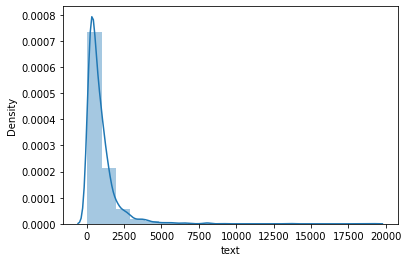

In [8]:
# Title length in words
fig = sns.distplot(text_words, bins=20)

___

View correlation between title length and article length:


,title words,text words
title words,1.00000,-0.09859
text words,-0.09859,1.00000


Heatmap:


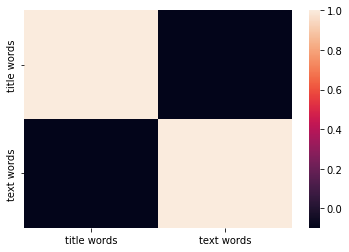

In [9]:
# View correlation between title length and article length
df = pd.concat([title_words, text_words], ignore_index=True, axis=1)
df.columns = ["title words", "text words"]
print("View correlation between title length and article length:")
df.corr(method="pearson")
print("Heatmap:")
fig = sns.heatmap(df.corr(method="pearson"))

There is no significant correlation between title and article length.

___

In [10]:
# Number of records in dataframe:
print(f"There are {len(articles)} records in this dataframe.")

There are 3122 records in this dataframe.


___

___

Text(0.5, 1.0, 'Authors by country')

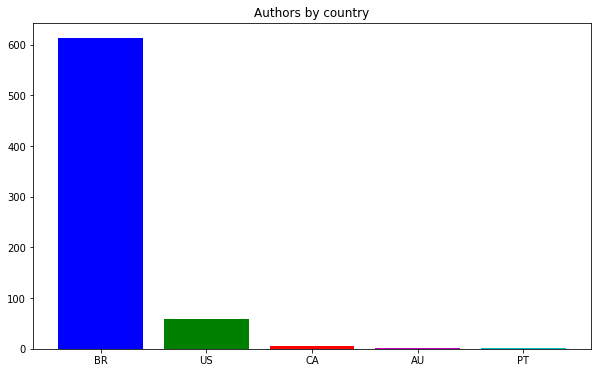

In [145]:
# View authors by country
data = articles["authorCountry"].value_counts()
fig = plt.bar(x = data.index, 
              height = data,
              color=["b", "g", "r", "m", "c"])
plt.title("Authors by country")
plt.show()

___

In [168]:
print("Authors by region")
articles["authorRegion"].value_counts()

Authors by region


SP     533
MG      75
NY      20
NJ      16
GA       7
IL       6
ON       4
RJ       4
NSW      2
TX       2
?        2
SC       2
RI       1
AB       1
FL       1
13       1
WA       1
CA       1
MS       1
Name: authorRegion, dtype: int64

___

In [104]:
# View event types
print("Event types:")
articles["eventType"].value_counts()

Event types:


CONTENT SHARED     3047
CONTENT REMOVED      75
Name: eventType, dtype: int64

___

In [250]:
# View articles content type
print("Articles content type:")
articles["contentType"].value_counts()

Articles content type:


HTML     3101
VIDEO      11
RICH       10
Name: contentType, dtype: int64

___